In [154]:
import pandas
import json
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import os
import sys
%matplotlib inline
plt.style.use('bmh')
plt.style.use('dark_background')
sys.path.append("/work/alex/projects/AI and Machine Learning/Performance/benchmarker/sysinfo")
from cute_device import get_cute_device_str

In [155]:
path="/work/alex/data/DL_perf/json/"

In [156]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    max_height=200
    for rect in rects:
        height = rect.get_height()
        if height<15:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '{:.2f}'.format(height), ha='center', va='bottom', fontsize=14)
        if height>max_height:
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*max_height, '{:.2f}'.format(height), ha='center', va='bottom', fontsize=14, color="red")

In [157]:
def read_file(f):
    with open(f) as f:
        data = json.load(f)
    return data

def read_df_from_dir(path):
    data=[read_file(os.path.join(path,f)) for f in os.listdir(path) if not f.startswith("arch")]
    df=pandas.DataFrame(data)
    df["device"] = df["device"].apply(get_cute_device_str)
    return df

In [158]:
df = read_df_from_dir(path)

In [159]:
df

,batch_size,bytes_x_train,cnt_classes,cpu_brand,cpu_count,device,framework,framework_full,gpu,gpus,hostname,hostname_short,linux,nb_gpus,path_out,problem,shape_x_train,time
0,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,chainer,Chainer-2.0.0a1,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,conv2d_1,"[2048, 1, 128, 128]",2.866930
1,8,134217728,1.0,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,tensorflow,Keras-2.0.4/tensorflow_1.1.0-rc1,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,conv2d_2,"[2048, 1, 128, 128]",20.935622
2,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,mxnet,MXNet-0.9.3,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,conv2d_1,"[2048, 1, 128, 128]",1.267838
3,8,134217728,1.0,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,theano,Keras-2.0.3/theano_0.9.0,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,conv2d_2,"[2048, 1, 128, 128]",6.287895
4,512,456649800,57.0,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,tensorflow,Keras-2.0.3/tensorflow_1.1.0-rc1,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,lstm_char1,"[200285, 40, 57]",38.029440
5,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz,36,E5-2699,tensorflow,Keras-2.0.3/tensorflow_1.1.0-rc1,Tesla K40c,NaN,paris0.m.gsic.titech.ac.jp,paris0,Linux-3.10.0-327.36.2.el7.x86_64-x86_64-with-c...,0,/work/alex/data/DL_perf/json,conv2d_1,"[2048, 1, 128, 128]",0.874078
6,8,134217728,1.0,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,theano,Keras-2.0.4/theano_0.9.0,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,conv2d_2,"[2048, 1, 128, 128]",6.281071
7,8,134217728,1.0,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,tensorflow,Keras-2.0.4/tensorflow_1.1.0-rc1,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,conv2d_1,"[2048, 1, 128, 128]",1.711512
8,8,134217728,NaN,Intel(R) Xeon(R) CPU E5-2699 v3 @ 2.30GHz,36,E5-2699,tensorflow,Keras-2.0.3/tensorflow_1.1.0-rc1,Tesla K40c,NaN,paris0.m.gsic.titech.ac.jp,paris0,Linux-3.10.0-327.36.2.el7.x86_64-x86_64-with-c...,0,/work/alex/data/DL_perf/json,conv3d_1,"[1024, 1, 32, 32, 32]",8.861501
9,512,456649800,57.0,Intel(R) Xeon(R) CPU E5-2650 v3 @ 2.30GHz,40,P100-PCIE,theano,Keras-2.0.3/theano_0.9.0,Tesla P100-PCIE-16GB,[1],roma4.m.gsic.titech.ac.jp,roma4,Linux-3.10.0-514.16.1.el7.x86_64-x86_64-with-c...,1,./,lstm_char1,"[200285, 40, 57]",29.548766


In [160]:
#df.sort_values(by=["device","framework"],inplace=True)
#df.sort_values(by=["time"],inplace=True)

In [161]:
#filter what to plot
devices=df["device"].unique()
print(devices)
#df

['P100-PCIE' 'E5-2699']


In [162]:
def filter_by(df,filters):
    df_plot = df
    for key in filters:
        df_plot=df_plot[df_plot[key]==filters[key]]
    return df_plot
    

In [163]:
#df_filtered = filter_by(df,filters={"device":"P100-PCIE"})

In [164]:
def render(key,filters,color):
    id_dev=0
    df_filtered = filter_by(df,filters)
    df_plot=df_filtered.groupby([key],as_index=False).mean()
    if df_plot.shape[0]<1:
        return "nothing to plot"
    df_plot.reset_index()
    df_plot.sort_values(by=["time"],inplace=True, ascending=False)

    mpl.rcParams['figure.figsize'] = 12, 5
    ax = plt.subplot('111')#, facecolor='white')
    width=0.5
    #ax.set_ylim(0,200)
    err = df_filtered.groupby([key]).std()["time"]
    #print (err)
    error_config = {'ecolor': 'r'}
    bars = plt.bar(np.arange(len(df_plot))+width/2,df_plot["time"],width=width,color=color, yerr=err, error_kw=error_config)
    autolabel(bars,ax)
    plt.ylabel("epoch time, s",size=18)
    plt.xticks(np.arange(len(df_plot))+0.25)
    plt.yticks(size=18)
    
    #ax.set_xticks(np.arange(len(labels))+(width*cnt_models)/2, minor=False)
    #ax.set_xticklabels(df["device"], minor=False,size=18,rotation=0)
    ax.set_xticklabels(df_plot[key], minor=False,size=18,rotation=0)
    plt.grid(b=False, which='major', axis='x', )

    plt.tick_params(axis='x', which='both', bottom='off', top='off',  labelbottom='on')
    plt.tick_params(axis='y', which='both', left='off', right='off')
    name_out=""
    title = ""
    for key in filters:
        name_out+=filters[key]+"_"
        title+=filters[key]+"  "
    name_out = name_out[:-1]
    plt.title(title[:-1])
    print(name_out)
    plt.savefig(os.path.join("./plots",name_out+".svg"),bbox_inches="tight",transparent=True)
    plt.show()
#todo: time per byte

conv2d_2_chainer


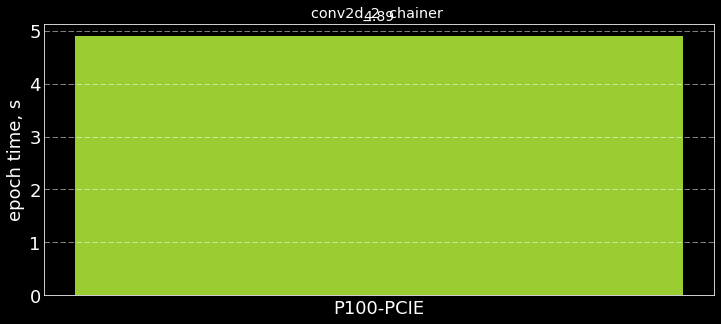

In [165]:
#render(key="framework",filters={"device":"P100-PCIE","problem":"conv2d_1"},color="yellowgreen")

render(key="device",filters={"framework":"chainer","problem":"conv2d_2"},color="yellowgreen")

conv2d_1_P100-PCIE


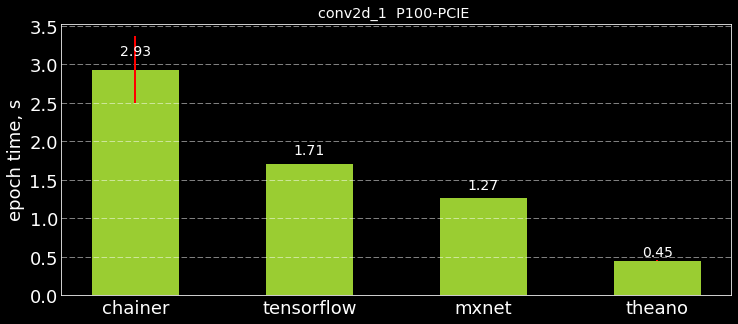

conv2d_2_P100-PCIE


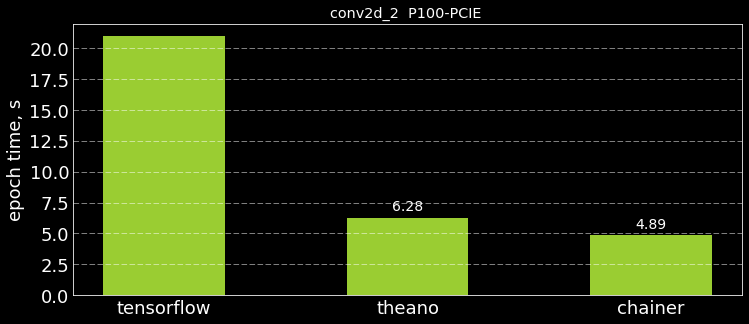

lstm_char1_P100-PCIE


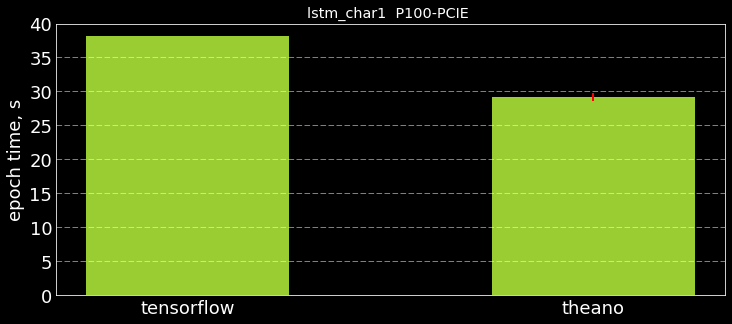

conv3d_1_P100-PCIE


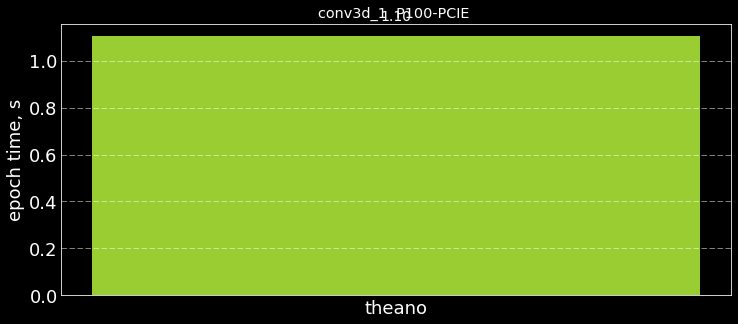

In [166]:
#    color=["dodgerblue","yellowgreen"][id_dev]
for problem in df["problem"].unique():
    #render(key="framework",filters={"device":"E5-2699","problem":problem},color="dodgerblue")
    render(key="framework",filters={"device":"P100-PCIE","problem":problem},color="yellowgreen")



conv2d_1_chainer


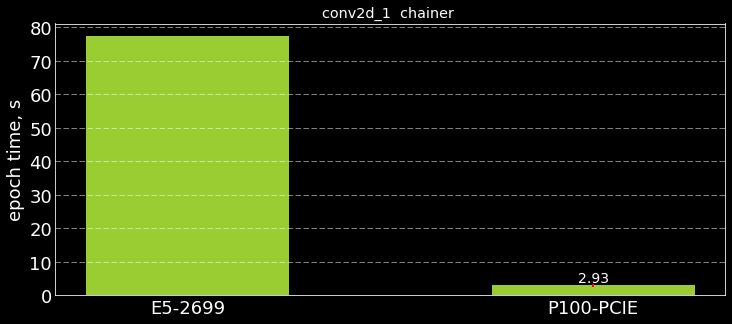

conv2d_2_chainer


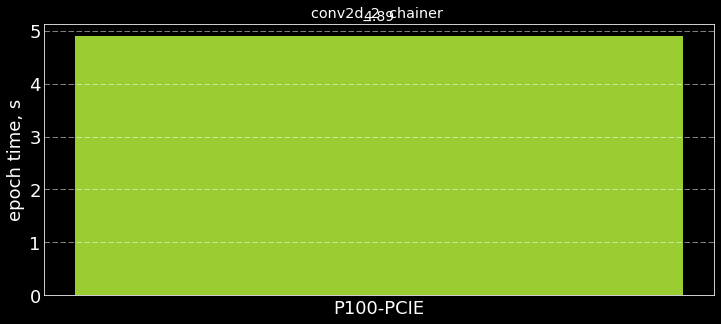

conv3d_1_chainer


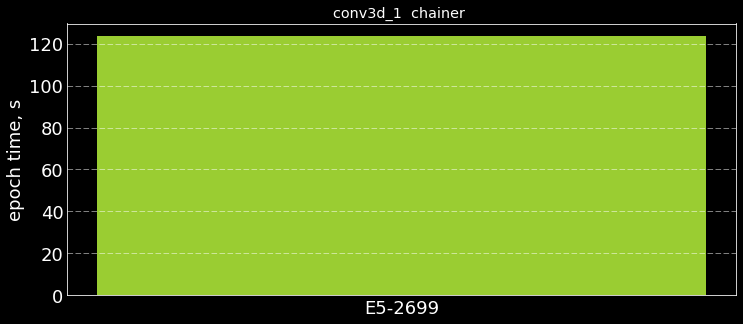

In [167]:
for problem in df["problem"].unique():
    render(key="device",filters={"problem":problem,"framework":"chainer"},color="yellowgreen")